Q.1. Write python code from scratch for simple Linear Regression problem, the following training data are given.

     X = [2,  2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
     Y = [5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8]
The model Y as a linear function of X
 
  (a) Use batch gradient descent learning algorithm to learn model parameters for α = 0.01 choose random values of weights and bias and epochs=1000.  Use MSE as loss function with an appropriate convergence criterion. 
  
  (b) Plot cost function (J) for the learning duration 
  (c) plot the regression line  (d) repeat (b) to (c) for stochastic gradient descent  and Adam optimization algorithm


Batch Gradient descent Algorithm
Initial weight : [-0.68059681]
Initial bias : [2.49819021]
Updated weight : [1.81285235]
Updated bias : [1.8530763]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


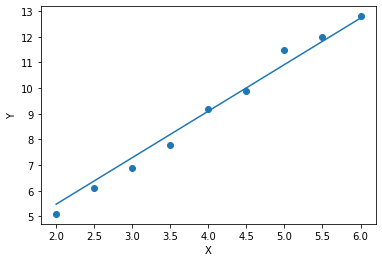

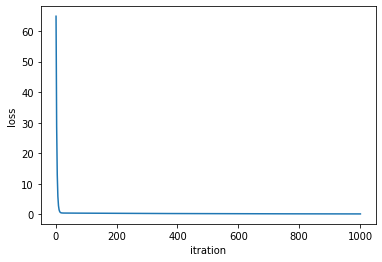



Stochastic Gradient descent algorithm
[1.2495584]


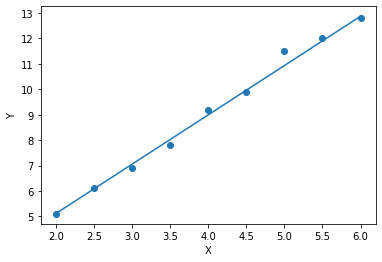

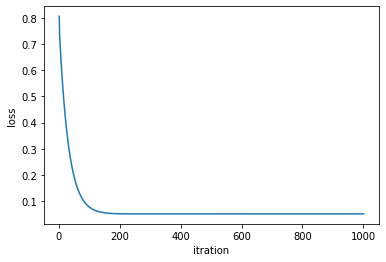



Adam Optimiser


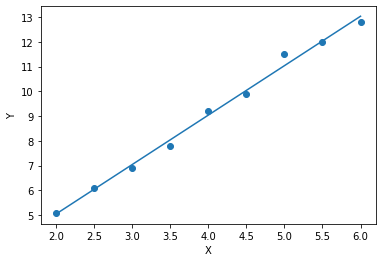

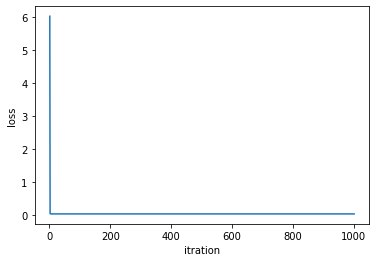

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6])
Y = np.array([5.1, 6.1, 6.9, 7.8, 9.2, 9.9, 11.5, 12, 12.8])
w = np.random.randn(1) # initialise waight term
b = np.random.randn(1) # initialise bias term
print('Batch Gradient descent Algorithm')
print('Initial weight :',w)
print('Initial bias :',b)
plt.scatter(X,Y)
lr = 0.01 #learning rate
#batch gradient descent algorithm
epochs = 1000
m=X.shape[0]
J = [] #cost function

#Batch gradient descent
for i in range(1000):
  dw = 1.0/m*np.sum((b+w*X[j]-Y[j])*X[j] for j in range(m))
  db = 1.0/m*np.sum((b+w*X[j]-Y[j]) for j in range(m))
  w = w - lr*dw
  b = b - lr*db
  J.append(np.sum((b+w*X-Y)**2)*1.0/m)
print('Updated weight :',w)
print('Updated bias :',b)
# a)
function = lambda X : b + w*X
plt.plot(X, function(X))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# b)
x = np.linspace(1,1001,1000)
plt.plot(x,J)
plt.xlabel('itration')
plt.ylabel('loss')
plt.show()

#Stochastic gradient descent
print('\n')
print('Stochastic Gradient descent algorithm')
Js = [] #cost function
W = np.random.randn(1) # initialise waight term
B = np.random.randn(1) # initialise bias term
for j in range(1000):
  for i in range(m):
    dW = 2*(B+W*X[i]-Y[i])*X[i]
    dB = 2*(B+W*X[i]-Y[i])
    W = W - lr*dW
    B = B - lr*dB
  Js.append(np.sum((B+W*X-Y)**2)*1.0/m)
print(B)
function = lambda X : B + W*X
plt.scatter(X,Y)
plt.plot(X, function(X))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
x = np.linspace(1,1001,1000)
plt.plot(x,Js)
plt.xlabel('itration')
plt.ylabel('loss')
plt.show()

# adam optimiser
print('\n')
print('Adam Optimiser')
w = np.random.randn(1) # initialise waight term
b = np.random.randn(1) # initialise bias term
def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)
def mse(a,b,x,y): #loss function
    return np.mean((a*x+b - y)**2)
def adam_gradient_descent(a, b, x, y, lr):
    b1=0.9 
    b2=0.999 
    epsilon=1e-4
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error
Ja = [] #loss function for adam optimiser
for i in range(1000):
  w,b,error = adam_gradient_descent(w, b, X, Y, lr)
  Ja.append(np.mean(error))
function = lambda X : b + w*X
plt.scatter(X,Y)
plt.plot(X, function(X))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
x = np.linspace(1,1001,1000)
plt.plot(x,Ja)
plt.xlabel('itration')
plt.ylabel('loss')
plt.show()



Q.2. The neural network shown in Fig.1 has the following hyper parameters and input: Choose random weights and bias of the neuron and learning rate =0.01 and inputs to the neuron and target values are as follows.


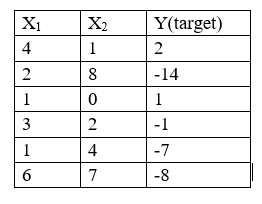

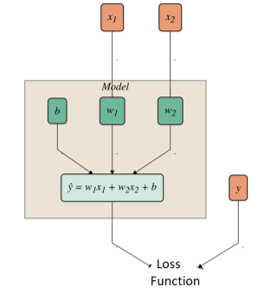

(a).Write a python code for predicted the output of neural network for given set of inputs using Stochastic Gradient Descent algorithm for the loss functions: ((i) Mean Square Error  (ii)  Squared Epsilon Hinge Loss (b)  Plot comparative loss curve (c) repeat(a)  and Adam optimization algorithm 

Initial w1 : -0.21306512087025692
Initial w2 : 0.6672240408093904
Initial b : [1.84411151]
[  0.9818551  -13.13316891   2.05688796  -0.09317777  -7.51507866
  -8.10425969]
[  0.61623262 -13.17925438   1.52991485  -0.2974496   -8.04458319
  -7.8257453 ]


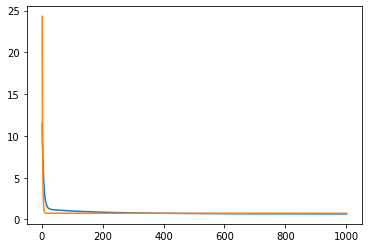



Adam Optimiser
[  0.79815432 -13.32141482   1.91032997  -0.31402134  -7.60584429
  -8.40863543]


Adam Optimiser
[  0.46143631 -13.35653766   1.4222503   -0.49937769  -8.09482648
  -8.14035806]


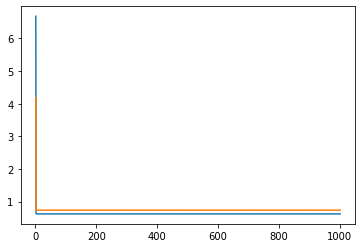

In [2]:
w1,w2 = np.random.randn(2)
b = np.random.randn(1)
print('Initial w1 :', w1)
print('Initial w2 :', w2)
print('Initial b :', b)
lr = 0.01 # learning rate
x1 = np.array([2, 4, 1, 3, 1, 6])
x2 = np.array([1, 8, 0, 2, 4, 7])
y = np.array([2, -14, 1, -1, -7, -8])
epochs = 1000
m = x1.shape[0]

# Mean square error
J = [] #cost function
for i in range(1000):
  for j in range(m):
    dw1 = (b + w1*x1[j] + w2*x2[j] - y[j])*x1[j]
    dw2 = (b + w1*x1[j] + w2*x2[j] - y[j])*x2[j]
    db = (b + w1*x1[j] + w2*x2[j] - y[j])
    w1 = w1 - lr*dw1
    w2 = w2 - lr*dw2
    b = b - lr*db*1.0/m
  J.append(np.sum((b+w1*x1+w2*x2-y)**2)/m)
y_hat = b + w1*x1 + w2*x2
print(y_hat)
x = np.linspace(1,1001,1000)
plt.plot(x,J)


#Squared epsilion hinge loss
Js = [] #cost function
w1,w2 = np.random.randn(2)
b = np.random.randn(1)
epsilon = 0.01
for i in range(1000):
  for j in range(m):
    l = (b+w1*x1[j]+w2*x2[j]-y[j])**2 - epsilon**2
    if(l<0):
      l=0
    if(l==0):
      dw1=0
      dw2=0
      db=0
    else:
      dw1 = 2*(b+w1*x1[j]+w2*x2[j]-y[j])*x1[j]
      dw2 = 2*(b+w1*x1[j]+w2*x2[j]-y[j])*x2[j]
      db = 2*(b+w1*x1[j]+w2*x2[j] -y[j])
    w1 = w1 - lr*dw1
    w2 = w2 - lr*dw2
    db = b - lr*db
  Js.append(np.sum((b+w1*x1+w2*x2-y)**2)/m)
y_hat = b + w1*x1+w2*x2
print(y_hat)
plt.plot(x,Js)
plt.show()  


#Adam optimiser and mse loss
# adam optimiser
print('\n')
print('Adam Optimiser')
w1,w2 = np.random.randn(2) # initialise waight term
b = np.random.randn(1) # initialise bias term
def gradient(w1,w2,b,x1,x2,y): #mse derivatives
    return np.mean(x1*(w1*x1+w2*x2+b-y), axis=-1),np.mean(x2*(w1*x1+w2*x2+b-y), axis=-1), np.mean(w1*x1+w2*x2+b-y, axis=-1)
def mse(w1,w2,b,x1,x2,y): #loss function
    return np.mean((w1*x1+w2*x2+b-y)**2)
def adam_gradient_descent(w1,w2,b,x1,x2,y, lr):
    b1=0.9 
    b2=0.999 
    epsilon=1e-4
    prev_error = 0
    m_w1 = v_w1 = m_w2 = v_w2 = m_b = v_b = 0
    moment_m_w1 = moment_v_w1 = moment_m_w2 = moment_v_w2 = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_w1,gradient_w2,gradient_b = gradient(w1,w2,b,x1,x2,y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(w1,w2,b,x1,x2,y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(w1,w2,b,x1,x2,y)
        error = np.insert(error, len(error), prev_error)

        m_w1 = b1 * m_w1 + (1-b1)*gradient_w1
        v_w1 = b2 * v_w1 + (1-b2)*gradient_w1**2
        m_w2= b1 * m_w2 + (1-b1)*gradient_w2
        v_w2 = b2 * v_w2 + (1-b2)*gradient_w2**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_w1 = m_w1 / (1-b1**t)
        moment_v_w1 = v_w1 / (1-b2**t)
        moment_m_w2 = m_w2 / (1-b1**t)
        moment_v_w2 = v_w2 / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        w1 -= (lr*moment_m_w1) / (moment_v_w1**0.5 + 1e-8)
        w2 -= (lr*moment_m_w2) / (moment_v_w2**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return w1,w2, b, error
Ja = [] #loss function for adam optimiser
for i in range(1000):
  w1,w2,b,error = adam_gradient_descent(w1,w2, b, x1,x2,y,lr)
  Ja.append(np.mean(error))
y_hat = b + w1*x1 + w2*x2
print(y_hat)

#Adam optimiser and squared epsilon hinge loss
# adam optimiser
print('\n')
print('Adam Optimiser')
w1,w2 = np.random.randn(2) # initialise waight term
b = np.random.randn(1) # initialise bias term
def gradient1(w1,w2,b,x1,x2,y): #mse derivatives
    eps = 0.01
    l = np.mean((b+w1*x1+w2*x2-y)**2 - eps**2)
    if(l<0):
      l=0
    if(l==0):
      dw1=0
      dw2=0
      db=0
    else:
      dw1 = np.mean(2*(b+w1*x1+w2*x2-y)*x1)
      dw2 = np.mean(2*(b+w1*x1+w2*x2-y)*x2)
      db = np.mean(2*(b+w1*x1+w2*x2-y))
    return dw1,dw2,b
def mse(w1,w2,b,x1,x2,y): #loss function
    return np.mean((w1*x1+w2*x2+b-y)**2)
def adam_gradient_descent(w1,w2,b,x1,x2,y, lr):
    b1=0.9 
    b2=0.999 
    epsilon=1e-4
    prev_error = 0
    m_w1 = v_w1 = m_w2 = v_w2 = m_b = v_b = 0
    moment_m_w1 = moment_v_w1 = moment_m_w2 = moment_v_w2 = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_w1,gradient_w2,gradient_b = gradient1(w1,w2,b,x1,x2,y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(w1,w2,b,x1,x2,y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(w1,w2,b,x1,x2,y)
        error = np.insert(error, len(error), prev_error)

        m_w1 = b1 * m_w1 + (1-b1)*gradient_w1
        v_w1 = b2 * v_w1 + (1-b2)*gradient_w1**2
        m_w2= b1 * m_w2 + (1-b1)*gradient_w2
        v_w2 = b2 * v_w2 + (1-b2)*gradient_w2**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_w1 = m_w1 / (1-b1**t)
        moment_v_w1 = v_w1 / (1-b2**t)
        moment_m_w2 = m_w2 / (1-b1**t)
        moment_v_w2 = v_w2 / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        w1 -= (lr*moment_m_w1) / (moment_v_w1**0.5 + 1e-8)
        w2 -= (lr*moment_m_w2) / (moment_v_w2**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return w1,w2, b, error
Jas = [] #loss function for adam optimiser
for i in range(1000):
  w1,w2,b,error = adam_gradient_descent(w1,w2, b, x1,x2,y,lr)
  Jas.append(np.mean(error))
y_hat = b + w1*x1 + w2*x2
print(y_hat)
x = np.linspace(1,1001,1000)
plt.plot(x,Ja)
plt.plot(x,Jas)
plt.show()

Q 3. A group of 20 students studied 0 to 6 hours for the exam.  Some passed and others failed. Results are given below 

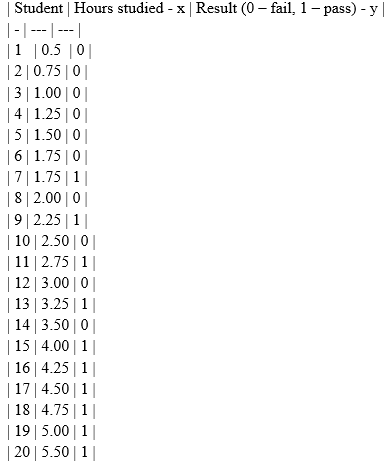

(a). Write python code for scratch to build neural network model to determine the optimal linear hypothesis using linear regression to predict if a student passes or not based on the number hours studied with the use for stochastic gradient descent and Adam optimization algorithm with model parameters for α = 0.01 choose random values of weights and bias and epochs=10000.   Use appropriate regression loss function.
(b). (i).Write python code from scratch to determine the optimal logistic hypothesis using logistic regression to predict if a student passes or not based on the number hours studied with the use for stochastic gradient descent with model parameters for α = 0.01 choose random values of weights and bias and epochs=40000; Loss function: Binary Cross Entropy (BCE), Threshold value=0.5  (a) plot the cost function vs  epoch (b) Predict pass or failed result of your designed model on random study hours enter by you.  (ii) Repeat part (i) analysis with Dice Loss function.
(iii) Repeat part (i) analysis with Adam optimization algorithm.


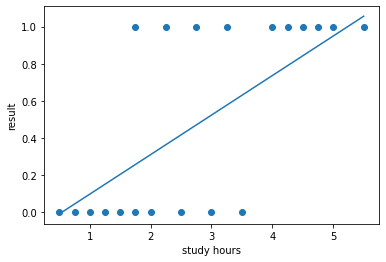

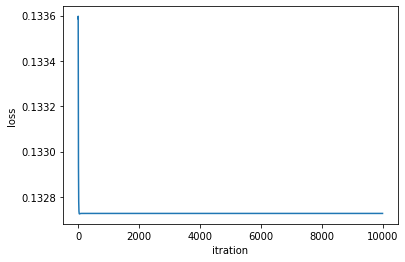

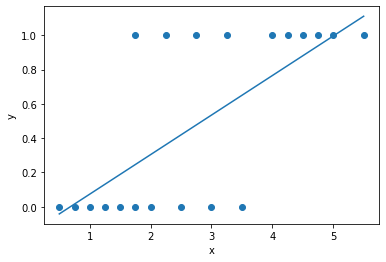

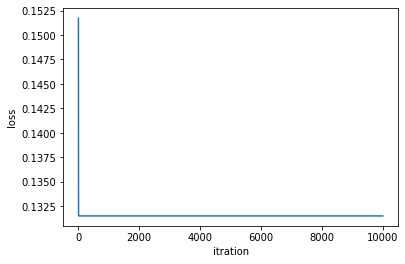

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


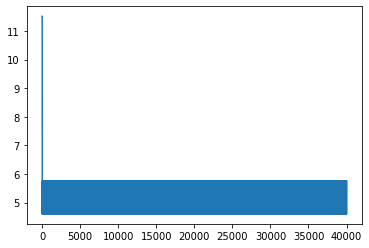


 Dice loss
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


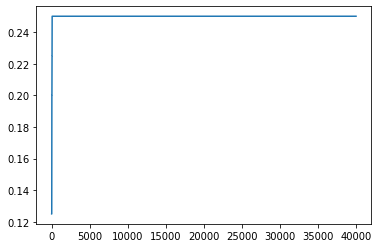

In [ ]:
# a)
x = np.array([0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
lr = 0.01 #learning rate
epochs = 10000
m = x.shape[0]
Js = [] #cost function
w = np.random.randn(1) # initialise waight term
b = np.random.randn(1) # initialise bias term
for j in range(10000):
  for i in range(m):
    dw = 2*(b+w*x[i]-y[i])*x[i]
    db = 2*(b+w*x[i]-y[i])
    w = w - lr*dw
    b = b - lr*db
  Js.append(np.sum((b+w*x-y)**2)*1.0/m)

function = lambda x : b + w*x
plt.scatter(x,y)
plt.plot(x, function(x))
plt.xlabel('study hours')
plt.ylabel('result')
plt.show()
x1 = np.linspace(1,10001,10000)
plt.plot(x1,Js)
plt.xlabel('itration')
plt.ylabel('loss')
plt.show()

#Stochastic gradient descent
w = np.random.randn(1) # initialise waight term
b = np.random.randn(1) # initialise bias term
def gradient(a,b,x,y): #mse derivatives
    return np.mean(x*(a*x+b-y), axis=-1), np.mean(a*x+b-y, axis=-1)
def mse(a,b,x,y): #loss function
    return np.mean((a*x+b - y)**2)
def adam_gradient_descent(a, b, x, y, lr):
    b1=0.9 
    b2=0.999 
    epsilon=1e-4
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error
Ja = [] #loss function for adam optimiser
for i in range(10000):
  w,b,error = adam_gradient_descent(w, b, x, y, lr)
  Ja.append(np.mean(error))
function = lambda x : b + w*x
plt.scatter(x,y)
plt.plot(x, function(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()
x1 = np.linspace(1,10001,10000)
plt.plot(x1,Ja)
plt.xlabel('itration')
plt.ylabel('loss')
plt.show()

#logistic regression 
w = np.random.randn(1)
b = np.random.randn(1)
epochs = 40000
tv = 0.5
J = [] #cost function
for i in range(epochs):
  for j in range(m):
    z = w*x[j]+b
    if z>=0.5:
      y_hat = 1
    else:
      y_hat = 0
    dw = (-1*y[j]/(y_hat+1e-5) + (1-y[j])/(1-y_hat+1e-5))*x[j]
    db = (-1*y[j]/(y_hat+1e-5) + (1-y[j])/(1-y_hat+1e-5))
    w = w - lr*dw
    b = b - lr*db
  
  s = 0.0
  for i in range(m):
    z = w*x[i]+b
    if z>=0.5:
      y_hat=1
    else:
      y_hat=0
    s += -y[i]*np.log(y_hat+1e-10)-(1-y[i])*np.log(1-y_hat+1e-10)
  J.append(s/m)
y_hat = []
for i in range(m):
  z = w*x[i]+b
  if z>=0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)
print(y_hat) 
x1 = np.linspace(1,40001,40000)
plt.plot(x1,J)
plt.show()


#Dice loss
print('\n Dice loss')
J = []
w = np.random.randn(1)
b = np.random.randn(1)
for i in range(40000):
  for j in range(m):
    z = w*x[j]+b
    if z>=0.5:
      y_hat = 1
    else:
      y_hat = 0
    dw = ((-1*(y[j]+y_hat+1)*(2*y[j])+(2*y_hat*y[j]+1))/(y[j]+y_hat+1)**2)*x[j]
    db = ((-1*(y[j]+y_hat+1)*(2*y[j])+(2*y_hat*y[j]+1))/(y[j]+y_hat+1)**2)
    w -= lr*dw
    b -= lr*db
  s = 0.0
  for i in range(m):
    z = w*x[i]+b
    if z>=0.5:
      y_hat=1
    else:
      y_hat=0
    s += 1-(2*y[i]*y_hat+1)/(y[i]+y_hat+1)
  J.append(s/m)
y_hat = []
for i in range(m):
  z = w*x[i]+b
  if z>=0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)
print(y_hat)    
x1 = np.linspace(1,40001,40000)
plt.plot(x1,J)
plt.show()
# adam optimiser with bce
w = np.random.randn(1) # initialise waight term\
b = np.random.randn(1) # initialise bias term
def gradient(a,b,x,y): #mse derivatives
    z = a*x+b
    if np.any(z)>=0.5:
      y_hat = 1
    else:
      y_hat = 0
    return np.mean((-1*y/(z) + (1-y)/(1-z))*x), np.mean(-1*y/(z) + (1-y)/(1-z))
def mse(a,b,x,y): #loss function
    return np.mean((a*x+b - y)**2)
def adam_gradient_descent(a, b, x, y, lr):
    b1=0.9 
    b2=0.999 
    epsilon=1e-4
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error
Ja = [] #loss function for adam optimiser
for i in range(40000):
  w,b,error = adam_gradient_descent(w, b, X, Y, lr)
  Ja.append(np.mean(error))
y_hat = []
for i in range(m):
  z = w*x[i]+b
  if z>=0.5:
    y_hat.append(1)
  else:
    y_hat.append(0)
print(y_hat)  
plt.plot(x1,Ja)
plt.show()  

Q.4. Build a model to recognize different handwritten digits from MNIST dataset by using multinomial logistic regression. Use of Adam optimization algorithm to learn model with parameters for α = 0.01, epoch = 40000 and random parameters of the model and Loss function: Softmax loss function. (a) Plot the cost function vs epoch (b) Predict the digit of your designed model on random test data enter by you (c) print confusion matrix (d) calculate classification metrics such as precision, recall, f1-score and accuracy



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
from sklearn.datasets import load_digits
digits=load_digits()
n_samples=len(digits.images)
print("Number of samples in the data set is :"+ str(n_samples))

x=digits.images.reshape((n_samples,-1))
print("Shape of input matrix x is : "+str(x.shape))
y=digits.target
print("Shape of target vector y is :"+str(y.shape))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=X_train.T
X_test=X_test.T
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)
y_train=y_train.T
y_test=y_test.T


Number of samples in the data set is :1797
Shape of input matrix x is : (1797, 64)
Shape of target vector y is :(1797,)


In [ ]:
# adam optimiser with bce
w = np.random.randn(1) # initialise waight term
b = np.random.randn(1) # initialise bias term
def gradient(a,b,x,y): #mse derivatives
    z = a*x+b
    if np.any(z)>=0.5:
      y_hat = 1
    else:
      y_hat = 0
    return np.mean((-1*y/(y_hat+1e-5) + (1-y)/(1-y_hat+1e-5))*x), np.mean(-1*y/(y_hat+1e-5) + (1-y)/(1-y_hat+1e-5))
def mse(a,b,x,y): #loss function
    return np.mean((a*x+b - y)**2)
def adam_gradient_descent(a, b, x, y, lr):
    b1=0.9 
    b2=0.999 
    epsilon=1e-4
    prev_error = 0
    m_a = v_a = m_b = v_b = 0
    moment_m_a = moment_v_a = moment_m_b = moment_v_b = 0
    t = 0
    error = np.array([])
    while True:
        gradient_a, gradient_b = gradient(a, b, x, y)
#         print(abs(mse(a, b, x, y) - prev_error))
        if abs(mse(a, b, x, y) - prev_error) < epsilon:
            break
        t += 1
        prev_error = mse(a, b, x, y)
        error = np.insert(error, len(error), prev_error)

        m_a = b1 * m_a + (1-b1)*gradient_a
        v_a = b2 * v_a + (1-b2)*gradient_a**2
        m_b = b1 * m_b + (1-b1)*gradient_b
        v_b = b2 * v_b + (1-b2)*gradient_b**2
        moment_m_a = m_a / (1-b1**t)
        moment_v_a = v_a / (1-b2**t)
        moment_m_b = m_b / (1-b1**t)
        moment_v_b = v_b / (1-b2**t)
        a -= (lr*moment_m_a) / (moment_v_a**0.5 + 1e-8)
        b -= (lr*moment_m_b) / (moment_v_b**0.5 + 1e-8)
    return a, b, error

Cost after iteration 0: 6.931433
Cost after iteration 1000: 3.262898
Cost after iteration 2000: 3.248166
Cost after iteration 3000: 3.234808
Cost after iteration 4000: 2.722599
Cost after iteration 5000: 1.930340
Cost after iteration 6000: 1.237044
Cost after iteration 7000: 0.767751
Cost after iteration 8000: 0.491657
Cost after iteration 9000: 0.341047
Cost after iteration 10000: 0.244711
Cost after iteration 11000: 0.172028
Cost after iteration 12000: 0.126399
Cost after iteration 13000: 0.096948
Cost after iteration 14000: 0.076117
Cost after iteration 15000: 0.060712
Cost after iteration 16000: 0.048979
Cost after iteration 17000: 0.040000
Cost after iteration 18000: 0.033183
Cost after iteration 19000: 0.027940
Cost after iteration 20000: 0.023885
Cost after iteration 21000: 0.020685
Cost after iteration 22000: 0.018118
Cost after iteration 23000: 0.016028
Cost after iteration 24000: 0.014305
Cost after iteration 25000: 0.012873
Cost after iteration 26000: 0.011666
Cost after ite

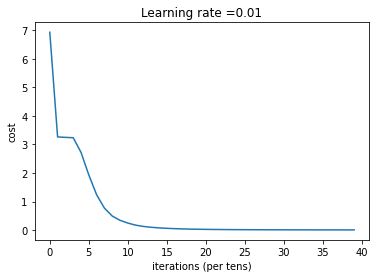

In [ ]:
# initialize parameters for deep neural networks
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) 
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters
def linear_forward(A, W, b):
    Z = np.dot(W,A)+b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache
# use ful activation functions and their derivatives
def sigmoid_(Z):
    return 1/(1+np.exp(-Z))

def relu_(Z):
    return Z*(Z>0)

def drelu_(Z):
    return 1. *(Z>0)

def dsigmoid_(Z):
    return sigmoid_(Z)*(1-sigmoid_(Z))

def sigmoid(Z):
    return sigmoid_(Z),Z

def relu(Z):
    return relu_(Z),Z
def linear_activation_forward(A_prev,W,b,activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache
# implementation of forward propogation for L layer neural network
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2   
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev,parameters['W'+str(l)],parameters['b'+str(l)],"relu")
        caches.append(cache)
    AL, cache = linear_activation_forward(A,parameters['W'+str(L)],parameters['b'+str(L)],"sigmoid")
    caches.append(cache)
    #assert(AL.shape == (1,X.shape[1]))
    return AL, caches
# cost function
def compute_cost(AL, Y):
    m=Y.shape[1]
    cost = -(1/m)*np.sum((Y*np.log(AL)+(1-Y)*np.log(1-AL)))
    cost=np.squeeze(cost)
    assert(cost.shape == ())
    return cost
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m)*np.dot(dZ,A_prev.T)
    db = (1/m)*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db
def relu_backward(dA,activation_cache):
    return dA* drelu_(activation_cache)
def sigmoid_backward(dA,activation_cache):
    return dA* dsigmoid_(activation_cache)
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    if activation == "relu":
        dZ = relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    return dA_prev,dW,db
# back propogation for L layers
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    #Y = Y.reshape(AL.shape)
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL,current_cache,"sigmoid")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA"+str(l+1)],current_cache,"relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads
#update parameters
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)]-(learning_rate)*grads["dW"+str(l+1)] 
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)]-(learning_rate)*grads["db"+str(l+1)]
    return parameters
# N layer neural network
layers_dims=[64,60,10,10]

def L_layer_model(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = [] 
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
parameters = L_layer_model(X_train, Y_train_, layers_dims, num_iterations = 40000, print_cost = True)

In [ ]:
def predict_L_layer(X,parameters):
    AL,caches=L_model_forward(X,parameters)
    prediction=np.argmax(AL,axis=0)
    return prediction.reshape(1,prediction.shape[0])
y_pred = predict_L_layer(X_train, parameters)
print("Training Accuracy : "+ str(np.sum(y_pred==y_train)/y_train.shape[1] * 100)+" %")
y_pred1=predict_L_layer(X_test,parameters)
print("Testing Accuracy : "+ str(np.sum(y_pred1==y_test)/y_test.shape[1] * 100)+" %")
print(y_pred.shape)
m=1437
y_pred1.shape
n=360


Training Accuracy : 100.0 %
Testing Accuracy : 97.22222222222221 %
(1, 1437)
[6 5 3 ... 7 7 8]
[6 5 3 ... 7 7 8]


In [ ]:
#Training dataset
print('Different type of accuracies for training dataset')
k=np.zeros((m,1))
gtruth=np.zeros((m,1))
for i in range(10):
  k[:,0]=y_pred[:,i]
  gtruth[:,0]=y_train[:,i]
  results = confusion_matrix(gtruth, k) 
  accu_predicted=accuracy_score(gtruth, k)
  precison=precision_score(gtruth, k, average=None)
  recall=recall_score(gtruth, k,average=None)
  F1=f1_score(gtruth, k,average=None)
  report=classification_report(gtruth, k)
  print("Confusion Matrix:", results)
  print("Predicted Accuarcy :")
  print(accu_predicted)
  print("Precison score :")
  print(precison)
  print("Recall score :")
  print(recall)
  print("F1 score :")
  print(F1)
  print("Accuracy Report :",report)
 
 #Test dataset
print('Different type of accuracies for test dataset')
k=np.zeros((n,1))
gtruth=np.zeros((n,1))
for i in range(10):
  k[:,0]=y_pred1[:,i]
  gtruth[:,0]=y_test[:,i]
  results = confusion_matrix(gtruth, k) 
  accu_predicted=accuracy_score(gtruth, k)
  precison=precision_score(gtruth, k, average=None)
  recall=recall_score(gtruth, k,average=None)
  F1=f1_score(gtruth, k,average=None)
  report=classification_report(gtruth, k)
  print("Confusion Matrix:", results)
  print("Predicted Accuarcy :")
  print(accu_predicted)
  print("Precison score :")
  print(precison)
  print("Recall score :")
  print(recall)
  print("F1 score :")
  print(F1)
  print("Accuracy Report :",report)
 


Different type of accuracies for training dataset
Confusion Matrix: [[1437]]
Predicted Accuarcy :
1.0
Precison score :
[1.]
Recall score :
[1.]
F1 score :
[1.]
Accuracy Report :               precision    recall  f1-score   support

         6.0       1.00      1.00      1.00      1437

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

Confusion Matrix: [[1437]]
Predicted Accuarcy :
1.0
Precison score :
[1.]
Recall score :
[1.]
F1 score :
[1.]
Accuracy Report :               precision    recall  f1-score   support

         5.0       1.00      1.00      1.00      1437

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437

Confusion Matrix: [[1437]]
Predicted Accuarcy :
1.0
Precison score :
[1.]
Recall score :
[1.]
F1 score :
[1.]
Accuracy Report :               precis

Q.5. Build a model to discriminate the red, green and blue points in 2-dimensional space shown below:

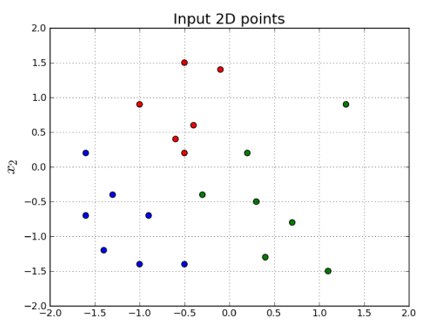

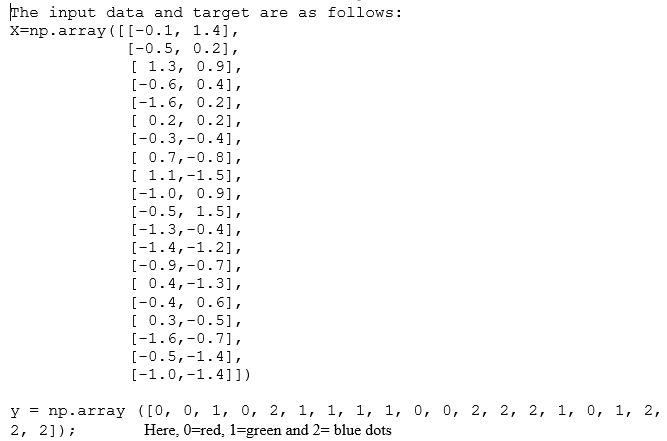

In other words, given a point in 2-dimensions, x=(x1, x2),  predict output either red, green or blue by using multinomial logistic regression. (a) (i) Compare predicted results with ground truth using bar chat plot (ii) plot loss curve (iii)  print confusion matrix (iv) calculate classification metrics such as precision, recall, f1-score and accuracy (v) Visualize classified data by Scatter plot. Use of gradient descent learning algorithm to learn model with parameters for α = 0.01, Softmax loss function and random parameters of the model. (b)  repeat part (a) Use Stochastic gradient descent algorithm to learn model  (c)  repeat part (a) with use  of Adam Optimization algorithm to learn model

Confusion Matrix: [[14  0]
 [ 0  6]]
Predicted Accuarcy :
1.0
Precison score :
[1. 1.]
Recall score :
[1. 1.]
F1 score :
[1. 1.]
Accuracy Report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        14
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix: [[13  0]
 [ 0  7]]
Predicted Accuarcy :
1.0
Precison score :
[1. 1.]
Recall score :
[1. 1.]
F1 score :
[1. 1.]
Accuracy Report :               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix: [[13  0]
 [ 0  7]]
Predicted Accua

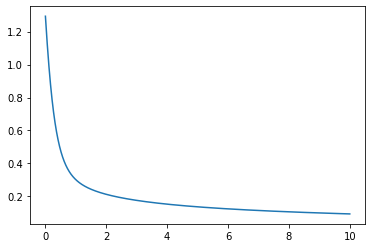

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 

def predict(y_hat):
  pred=y_hat
  for i in range(y_hat.shape[0]):
    pred[i]=y_hat[i]/max(y_hat[i,:])
    for j in range(y_hat.shape[1]):
      if pred[i,j]!=1:
        pred[i,j]=0
  return pred
def softmax(x):
  k=np.exp(x)
  l=np.sum(k,axis=1)
  l=np.reshape(l,(x.shape[0],1))
  return (k/l)

def cost(y_hat,y):
  y_hat=np.log(y_hat)
  cost=-y*y_hat
  return np.sum(cost)/y.shape[0]

l_r=0.01
num_iters=10000

x=np.array([[-0.1, 1.4], [-0.5, 0.2],[ 1.3, 0.9], [-0.6, 0.4],[-1.6, 0.2],[ 0.2, 0.2],[-0.3,-0.4], [ 0.7,-0.8], 
            [ 1.1,-1.5], [-1.0, 0.9],[-0.5, 1.5],[-1.3,-0.4],[-1.4,-1.2],[-0.9,-0.7],[ 0.4,-1.3],[-0.4, 0.6],
            [ 0.3,-0.5],[-1.6,-0.7],[-0.5,-1.4],[-1.0,-1.4]])
y=np.array([[1,0,0],[1,0,0],[0,1,0],[1,0,0],[0,0,1],[0,1,0],[0,1,0],[0,1,0],[0,1,0],[1,0,0],[1,0,0],[0,0,1],[0,0,1],[0,0,1],[0,1,0],[1,0,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1]])
m=x.shape[0]
x=np.c_[np.ones(m),x]
w=np.random.randn(3,3)

c=[]
for i in range(num_iters):
  z=np.dot(x,w)
  y_hat=softmax(z)
  dw=np.dot(x.T,(y_hat-y))
  w=w-(1.0/m)*l_r*dw
  c.append(cost(y_hat,y))

x=np.linspace(0,10,10000)                       #cost function
plt.plot(x,c)
y_pred=predict(y_hat)

k=np.zeros((m,1))
gtruth=np.zeros((m,1))
for i in range(3):
  k[:,0]=y_pred[:,i]
  gtruth[:,0]=y[:,i]
  results = confusion_matrix(gtruth, k) 
  accu_predicted=accuracy_score(gtruth, k)
  precison=precision_score(gtruth, k, average=None)
  recall=recall_score(gtruth, k,average=None)
  F1=f1_score(gtruth, k,average=None)
  report=classification_report(gtruth, k)
  print("Confusion Matrix:", results)
  print("Predicted Accuarcy :")
  print(accu_predicted)
  print("Precison score :")
  print(precison)
  print("Recall score :")
  print(recall)
  print("F1 score :")
  print(F1)
  print("Accuracy Report :",report)
 
